# Data Exploration

This notebook explores the imported data:
- Apple Watch Health data
- Oura Ring data
- PMData dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add parent directory to path
sys.path.append(str(Path().absolute().parent))

# Direct import to avoid __init__.py issues with oura_api
# Import the module directly without going through __init__.py
import importlib.util
apple_health_path = Path().absolute().parent / "src" / "data_collection" / "apple_health.py"
spec = importlib.util.spec_from_file_location("apple_health", apple_health_path)
apple_health_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(apple_health_module)
AppleHealthParser = apple_health_module.AppleHealthParser

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports successful - Ready to explore data!")


✓ Imports successful - Ready to explore data!


## 1. Apple Watch Data


In [4]:
# Parse Apple Health data
apple_xml = Path("../data/raw/apple/export.xml")

if not apple_xml.exists():
    print(f"✗ File not found: {apple_xml}")
    print("Please check the path")
else:
    parser = AppleHealthParser(str(apple_xml))
    
    # Get heart rate data
    hr_df = parser.get_heart_rate_data()
    print(f"✓ Heart rate records: {len(hr_df):,}")
    if not hr_df.empty:
        print(f"\nColumns: {list(hr_df.columns)}")
        print(f"\nSample:")
        print(hr_df.head())
    
    # Get activity data
    print("\n" + "-" * 70)
    activity_df = parser.get_activity_data()
    print(f"✓ Activity records: {len(activity_df):,}")
    if not activity_df.empty:
        print(f"\nActivity types: {activity_df['type'].unique()}")
        print(f"\nSample activity data:")
        print(activity_df.head())
    
    # Get sleep data
    print("\n" + "-" * 70)
    sleep_df = parser.get_sleep_data()
    print(f"✓ Sleep records: {len(sleep_df):,}")
    if not sleep_df.empty:
        print(f"\nSample sleep data:")
        print(sleep_df.head())


✓ Heart rate records: 343,523

Columns: ['type', 'original_type', 'value', 'start_date', 'end_date', 'source']

Sample:
              type                      original_type  value  \
243928  heart_rate  HKQuantityTypeIdentifierHeartRate   62.0   
243918  heart_rate  HKQuantityTypeIdentifierHeartRate   62.0   
243919  heart_rate  HKQuantityTypeIdentifierHeartRate   62.0   
243920  heart_rate  HKQuantityTypeIdentifierHeartRate   62.0   
243921  heart_rate  HKQuantityTypeIdentifierHeartRate   61.0   

                      start_date                   end_date           source  
243928 2020-09-27 07:41:54-08:00  2020-09-27 07:41:54 -0800  董政的 Apple Watch  
243918 2020-09-27 07:45:21-08:00  2020-09-27 07:45:21 -0800  董政的 Apple Watch  
243919 2020-09-27 07:45:26-08:00  2020-09-27 07:45:26 -0800  董政的 Apple Watch  
243920 2020-09-27 07:45:31-08:00  2020-09-27 07:45:31 -0800  董政的 Apple Watch  
243921 2020-09-27 07:45:32-08:00  2020-09-27 07:45:32 -0800  董政的 Apple Watch  

--------------------

## 2. Oura Ring Data


✓ Records: 61
✓ Columns: 54

Date range: 2025-11-01 to 2026-01-01

----------------------------------------------------------------------
Key Features:
  ✓ Readiness Score: mean=79.22
  ✓ Sleep Score: mean=71.29
  ✓ Activity Score: mean=82.03
  ✓ Average HRV: mean=85.17
  ✓ Average Resting Heart Rate: mean=55.60
  ✓ Total Sleep Duration: mean=26938.97

----------------------------------------------------------------------
Activity Features:
  ✓ Low Activity Time: mean=12159.34
  ✓ Long Periods of Inactivity: mean=0.49
  ✓ High Activity Time: mean=9.84
  ✓ Previous Day Activity Score: mean=81.09
  ✓ Activity Balance Score: mean=87.21
  ✓ Total Burn: mean=2550.61
  ✓ Medium Activity Time: mean=2279.02
  ✓ Activity Burn: mean=402.62
  ✓ Activity Score: mean=82.03
  ✓ Steps: mean=4752.84

----------------------------------------------------------------------
Sample Data:
        date  Readiness Score  Sleep Score  Activity Score
0 2025-11-01             81.0         80.0              76
1 

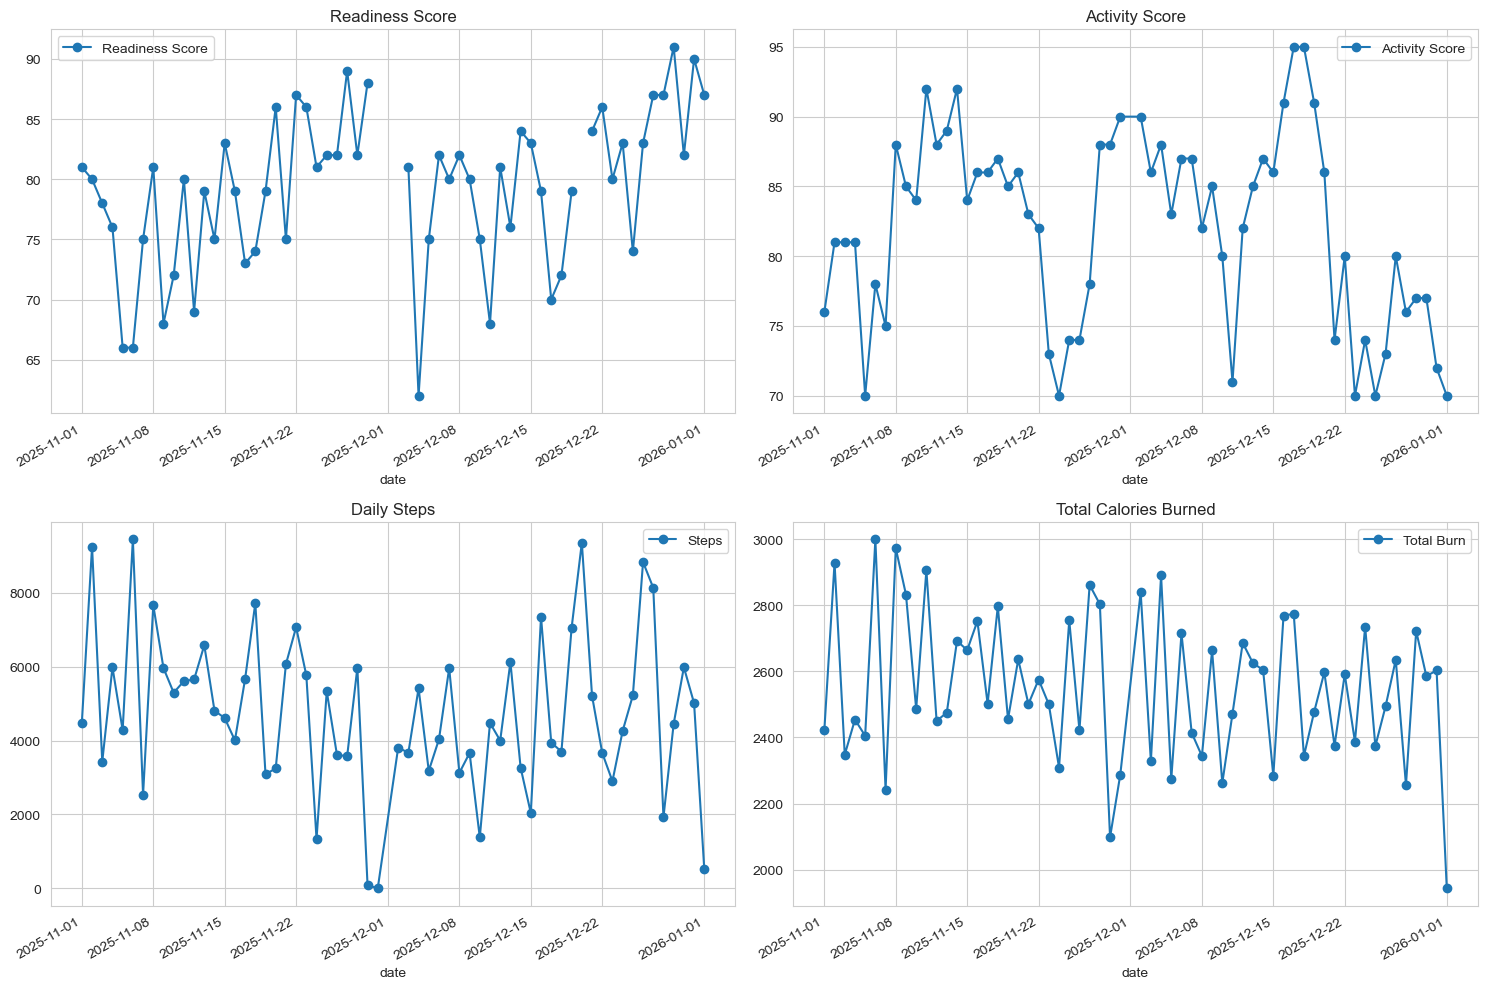

In [6]:
# Load Oura data
oura_file = Path("../data/raw/oura/oura_2025-11-01_2026-01-01_trends.csv")

if not oura_file.exists():
    print(f"✗ File not found: {oura_file}")
    print("Please check the path")
else:
    oura_df = pd.read_csv(oura_file)
    
    print(f"✓ Records: {len(oura_df)}")
    print(f"✓ Columns: {len(oura_df.columns)}")
    
    # Convert date to datetime if it's not already
    if 'date' in oura_df.columns:
        oura_df['date'] = pd.to_datetime(oura_df['date'], errors='coerce')
        dates = oura_df['date'].dropna()
        if len(dates) > 0:
            print(f"\nDate range: {dates.min().date()} to {dates.max().date()}")
    
    # Key features (skip 'date' column for mean calculation)
    print("\n" + "-" * 70)
    print("Key Features:")
    key_features = ['Readiness Score', 'Sleep Score', 'Activity Score', 
                    'Average HRV', 'Average Resting Heart Rate', 'Total Sleep Duration']
    for feat in key_features:
        if feat in oura_df.columns:
            # Only calculate mean for numeric columns
            if pd.api.types.is_numeric_dtype(oura_df[feat]):
                mean_val = oura_df[feat].mean()
                print(f"  ✓ {feat}: mean={mean_val:.2f}")
            else:
                print(f"  ✓ {feat}: (non-numeric column)")
    
    # Activity features
    print("\n" + "-" * 70)
    print("Activity Features:")
    activity_cols = [col for col in oura_df.columns 
                     if ('activity' in col.lower() or 'step' in col.lower() or 'burn' in col.lower())
                     and col != 'date']
    
    for col in activity_cols[:10]:  # Show first 10
        if col in oura_df.columns and oura_df[col].notna().any():
            if pd.api.types.is_numeric_dtype(oura_df[col]):
                mean_val = oura_df[col].mean()
                print(f"  ✓ {col}: mean={mean_val:.2f}")
            else:
                print(f"  ✓ {col}: (non-numeric)")
    
    # Show sample data
    print("\n" + "-" * 70)
    print("Sample Data:")
    print(oura_df[['date'] + key_features[:3]].head())
    
    # Visualize key metrics
    print("\n" + "-" * 70)
    print("Creating visualizations...")
    
    # Only plot if we have valid date column
    if 'date' in oura_df.columns and oura_df['date'].notna().any():
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        plot_data = oura_df.copy()
        plot_data = plot_data.sort_values('date')
        
        if 'Readiness Score' in plot_data.columns and pd.api.types.is_numeric_dtype(plot_data['Readiness Score']):
            plot_data.plot(x='date', y='Readiness Score', ax=axes[0, 0], title='Readiness Score', marker='o')
        if 'Activity Score' in plot_data.columns and pd.api.types.is_numeric_dtype(plot_data['Activity Score']):
            plot_data.plot(x='date', y='Activity Score', ax=axes[0, 1], title='Activity Score', marker='o')
        if 'Steps' in plot_data.columns and pd.api.types.is_numeric_dtype(plot_data['Steps']):
            plot_data.plot(x='date', y='Steps', ax=axes[1, 0], title='Daily Steps', marker='o')
        if 'Total Burn' in plot_data.columns and pd.api.types.is_numeric_dtype(plot_data['Total Burn']):
            plot_data.plot(x='date', y='Total Burn', ax=axes[1, 1], title='Total Calories Burned', marker='o')
        
        plt.tight_layout()
        plt.show()
    else:
        print("⚠ Cannot create plots: date column is not valid")


## 3. PMData Dataset


In [7]:
# Explore PMData structure
pmdata_dir = Path("../data/public/pmdata")

# List all participants
participants = sorted([d for d in pmdata_dir.iterdir() if d.is_dir() and d.name.startswith('p')])
print(f"Participants: {len(participants)}")

# Check structure of first participant
p1_dir = participants[0]
print(f"\nStructure of {p1_dir.name}:")
for subdir in sorted(p1_dir.iterdir()):
    if subdir.is_dir():
        csv_files = list(subdir.glob("*.csv"))
        print(f"  {subdir.name}/: {len(csv_files)} CSV files")
        if csv_files:
            sample_df = pd.read_csv(csv_files[0])
            print(f"    - {csv_files[0].name}: {len(sample_df)} records")


Participants: 16

Structure of p01:
  fitbit/: 1 CSV files
    - sleep_score.csv: 150 records
  food-images/: 0 CSV files
  googledocs/: 1 CSV files
    - reporting.csv: 109 records
  pmsys/: 3 CSV files
    - injury.csv: 24 records
